### This script contains the following:
#### 1. Import data and libraries
#### 2. Data wrangling
#### 3. Data cleaning
#### 4. Plotting a choropleth
#### 5. Does the analysis answer any existing research questions?

### 1. Import data and libraries

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
from folium.plugins import StripePattern
import json


In [25]:
# This command prompts matplotlib visuals to appear in the notebook
%matplotlib inline

In [26]:
# Import .json file for the U.S.
url=("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")
state_geo= f'{url}/us-states.json'
urlc=("https://codeload.github.com/gist/81818d30d23f012628aac1cdf672627d/zip/45dc8bee7b4fc349ec87931100e0f258bb59f8ea")
city_geo= f'{urlc}/usaCities.js'

In [27]:
# That's just in case you want to look at the JSON file contents here too:
f = open(r'/Users/schitchards/Career Foundry/Achievement 6/Data/Original Data/us-states.json')

In [28]:
#Return JSON object as a dictionary
data = json.load(f)

In [29]:
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [30]:
# Import the ecommerce data
#Define path
path = r'/Users/schitchards/Career Foundry/Achievement 6'
df = pd.read_csv(os.path.join(path,'Data','Prepared Data','df6_2.csv'))

In [31]:
df

Unnamed: 0.1  Unnamed: 0 Order Date  Row ID    Order ID       Ship Mode  \
0                0           0    20-1-01     849  2017107503  Standard Class   
1                1           1    20-1-01    4010  2017144463  Standard Class   
2                2           2    20-1-01    6683  2017154466     First Class   
3                3           3    20-1-01    8070  2017151750  Standard Class   
4                4           4    20-1-01    8071  2017151750  Standard Class   
...            ...         ...        ...     ...         ...             ...   
3307          3307        3307   20-12-30     908  2017143259  Standard Class   
3308          3308        3308   20-12-30     909  2017143259  Standard Class   
3309          3309        3309   20-12-30    1297  2017115427  Standard Class   
3310          3310        3310   20-12-30    1298  2017115427  Standard Class   
3311          3311        3311   20-12-30    5092  2017156720  Standard Class   

      Customer ID      Segment        Country           City  ...  \
0           14725     Consumer  United States         Lorain  ...   
1           20725     Consumer  United States    Los Angeles  ...   
2           13390  Home Office  United States       Franklin  ...   
3           15250     Consumer  United States     Huntsville  ...   
4           15250     Consumer  United States     Huntsville  ...   
...           ...          ...            ...            ...  ...   
3307        18865     Consumer  United States  New York City  ...   
3308        18865     Consumer  United States  New York City  ...   
3309        13975    Corporate  United States      Fairfield  ...   
3310        13975    Corporate  United States      Fairfield  ...   
3311        15580     Consumer  United States       Loveland  ...   

                                           Product Name    Sales Quantity  \
0                    Linden 10" Round Wall Clock, Black   48.896        4   
1     Howard Miller 11-1/2" Diameter Brentwood Wall ...  474.430       11   
2               Wilson Jones Easy Flow II Sheet Lifters    3.600        2   
3                         SAFCO Boltless Steel Shelving  454.560        5   
4     Tenex Carpeted, Granite-Look or Clear Contempo...  141.420        5   
...                                                 ...      ...      ...   
3307                          Gear Head AU3700S Headset   90.930        7   
3308               Wilson Jones Legal Size Ring Binders   52.776        3   
3309    Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl   13.904        2   
3310                                 GBC Binding covers   20.720        2   
3311                                Bagged Rubber Bands    3.024        3   

     Discount    Profit     Price Break Even Price  Month  Price category  \
0         0.2    8.5568   14.6688          10.0848      1       Low price   
1         0.0  199.2606   43.1300          25.0154      1       Low price   
2         0.0    1.7280    1.8000           0.9360      1       Low price   
3         0.2 -107.9580  109.0944         112.5036      1    Middle price   
4         0.6 -187.3815   45.2544          65.7603      1       Low price   
...       ...       ...       ...              ...    ...             ...   
3307      0.0    2.7279   12.9900          12.6003     12       Low price   
3308      0.2   19.7910   21.1104          10.9950     12       Low price   
3309      0.2    4.5188    8.3424           4.6926     12       Low price   
3310      0.2    6.4750   12.4320           7.1225     12       Low price   
3311      0.2   -0.6048    1.2096           1.2096     12       Low price   

      Profit Category  
0              Profit  
1              Profit  
2              Profit  
3                Loss  
4                Loss  
...               ...  
3307           Profit  
3308           Profit  
3309           Profit  
3310           Profit  
3311             Loss  

[3312 rows x 26 columns]

In [32]:
df.State.unique()

array(['Ohio', 'California', 'Wisconsin', 'Texas', 'North Carolina',
       'Alabama', 'Michigan', 'Florida', 'Washington', 'Pennsylvania',
       'District of Columbia', 'Missouri', 'Colorado', 'Tennessee',
       'Indiana', 'Massachusetts', 'Vermont', 'New York', 'Connecticut',
       'Illinois', 'Montana', 'Arizona', 'Georgia', 'Kansas', 'Iowa',
       'Virginia', 'Maryland', 'Minnesota', 'Louisiana', 'New Jersey',
       'Oklahoma', 'Delaware', 'Kentucky', 'Mississippi', 'Arkansas',
       'New Mexico', 'South Carolina', 'Rhode Island', 'Nevada', 'Oregon',
       'North Dakota', 'Idaho', 'New Hampshire', 'Nebraska',
       'West Virginia', 'South Dakota', 'Utah'], dtype=object)

### 2. Data wrangling 

State values match in both datasets

### 3. Data Cleaning

In [33]:
# Check for missing values
df.isnull().sum()

Unnamed: 0.1        0
Unnamed: 0          0
Order Date          0
Row ID              0
Order ID            0
Ship Mode           0
Customer ID         0
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
Price               0
Break Even Price    0
Month               0
Price category      0
Profit Category     0
dtype: int64

In [34]:
# Duplicates check
dups=df.duplicated()
dups.shape #No duplicates

(3312,)

##### Extreme values checks

<AxesSubplot:xlabel='Price', ylabel='Count'>

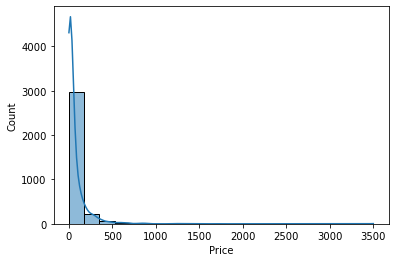

In [35]:
# Extreme values checks
sns.histplot(df['Price'], bins=20, kde = True) # shows extreme values for 'Price'

In [36]:
# Check how many extreme values
df[df['Price'] >2000]

Unnamed: 0.1  Unnamed: 0 Order Date  Row ID    Order ID       Ship Mode  \
427            427         427    20-3-23    8154  2017140151     First Class   
505            505         505    20-4-01    4219  2017149881     First Class   
2302          2302        2302   20-10-22    2624  2017127180     First Class   
2443          2443        2443   20-11-04     684  2017168116        Same Day   
2644          2644        2644   20-11-17    4191  2017166709  Standard Class   

      Customer ID      Segment        Country           City  ...  \
427         19360     Consumer  United States        Seattle  ...   
505         18535    Corporate  United States  San Francisco  ...   
2302        21385  Home Office  United States  New York City  ...   
2443        14635    Corporate  United States     Burlington  ...   
2644        15040     Consumer  United States         Newark  ...   

                                   Product Name      Sales Quantity Discount  \
427       Canon imageCLASS 2200 Advanced Copier  13999.960        4      0.0   
505   Cubify CubeX 3D Printer Double Head Print   4799.984        2      0.2   
2302      Canon imageCLASS 2200 Advanced Copier  11199.968        4      0.2   
2443  Cubify CubeX 3D Printer Triple Head Print   7999.980        4      0.5   
2644      Canon imageCLASS 2200 Advanced Copier  10499.970        3      0.0   

         Profit      Price Break Even Price  Month  Price category  \
427   6719.9808  3499.9900        1819.9948      3      High price   
505    359.9988  2879.9904        2219.9926      4      High price   
2302  3919.9888  3359.9904        1819.9948     10      High price   
2443 -3839.9904  2999.9925        2959.9926     11      High price   
2644  5039.9856  3499.9900        1819.9948     11      High price   

      Profit Category  
427            Profit  
505            Profit  
2302           Profit  
2443             Loss  
2644           Profit  

[5 rows x 26 columns]

High prices correspond with product item, no need to remove.

In [37]:
df.dtypes

Unnamed: 0.1          int64
Unnamed: 0            int64
Order Date           object
Row ID                int64
Order ID              int64
Ship Mode            object
Customer ID           int64
Segment              object
Country              object
City                 object
State                object
Postal Code           int64
Region               object
Product ID           object
Category             object
Sub-Category         object
Product Name         object
Sales               float64
Quantity              int64
Discount            float64
Profit              float64
Price               float64
Break Even Price    float64
Month                 int64
Price category       object
Profit Category      object
dtype: object

### 4. Plotting a choropleth

#### State sales

In [38]:
# Create a data frame with just the states and the values for price we want plotted
data_to_plot3 = df.groupby('State', as_index = False)['Sales'].sum()

In [39]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [40,-95], zoom_start = 4)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations

folium.Choropleth(geo_data = state_geo, data = data_to_plot3, columns = ['State', 'Sales'], key_on = 'feature.properties.name', fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1, legend_name = 'Sum of Sales').add_to(map)

folium.LayerControl().add_to(map)

In [40]:
folium.Choropleth(geo_data=state_geo,
                name='Choropleth',
                data=data_to_plot3,
                columns=['State','Sales'],
                key_on='feature.id',
                fill_color="YlGn",
                fill_opacity=0.7,
                line_opacity=.1,
                legend_name="Sum of Sales",
).add_to(map)

folium.LayerControl().add_to(map)

map

#### State Profit

In [41]:
# Create a data frame with just the states and the values for price we want plotted
data_to_plot = df.groupby('State')['Profit'].sum()

In [42]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [40,-95], zoom_start = 4)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations

folium.Choropleth(geo_data = state_geo, data = data_to_plot, columns = ['City', 'Profit'], key_on = 'feature.properties.name', fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1, legend_name = 'Sum of Profits').add_to(map)

folium.LayerControl().add_to(map)

In [43]:
folium.Choropleth(geo_data=state_geo,
                name='Choropleth',
                data=data_to_plot,
                columns=['State','Profits'],
                key_on='feature.id',
                fill_color="YlGn",
                fill_opacity=0.7,
                line_opacity=.1,
                legend_name=" Sum of Profit",
).add_to(map)

folium.LayerControl().add_to(map)

map

In [44]:
map.save('profit_data.pdf')

#### State customer count

In [45]:
# Create a data frame with just the states and the values for customer count we want plotted
data_to_plot2 = df.groupby('State', as_index = False)['Customer ID'].count()

In [46]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [40,-95], zoom_start = 4)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations

folium.Choropleth(geo_data = state_geo, data = data_to_plot2, columns = ['State', 'Customer ID'], key_on = 'feature.properties.name', fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1, legend_name = 'Customer Count').add_to(map)

folium.LayerControl().add_to(map)

In [47]:
folium.Choropleth(geo_data=state_geo,
                name='Choropleth',
                data=data_to_plot2,
                columns=['State','Customer ID'],
                key_on='feature.id',
                fill_color="YlGn",
                fill_opacity=0.7,
                line_opacity=.1,
                legend_name="Customer Count",
                hover_data=['State']
).add_to(map)

folium.LayerControl().add_to(map)

map

In [48]:
map.save('customer_data.html')

#### Sum of discounts

In [49]:
# Create a data frame with just the states and the values for discount we want plotted
data_to_plot4 = df.groupby('State', as_index = False)['Discount'].sum()

In [50]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [40,-95], zoom_start = 4)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations

folium.Choropleth(geo_data = state_geo, data = data_to_plot4, columns = ['State', 'Discount'], key_on = 'feature.properties.name', fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1, legend_name = 'Sum of Discounts').add_to(map)

folium.LayerControl().add_to(map)

In [51]:
folium.Choropleth(geo_data=state_geo,
                name='Choropleth',
                data=data_to_plot4,
                columns=['State','Discount'],
                key_on='feature.id',
                fill_color="YlGn",
                fill_opacity=0.7,
                line_opacity=.1,
                legend_name="Sum of Discounts",
).add_to(map)

folium.LayerControl().add_to(map)

map

In [52]:
map.save('discount_data.pdf')

### 5. Does the analysis answer any existing research questions?

The analysis confirms that some states are more profitable than others and those that are the least profitable, like Texas, are selling more products at a discounted rate.

#### New research questions?

In [53]:
# What is each states customer lifetime value